# CUSTOMER CHURN PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\customer_churn (4).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd.set_option("display.max_columns",None)


In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Tasks to be performed

# Data Manipulation

In [10]:
#● Extract the 5th column and store it in ‘customer_5’

customer_5 =df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [11]:
# ● Extract the 15th column and store it in ‘customer_15’

customer_15 = df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [12]:
# ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

filter = (df["gender"]=="Male") & (df["SeniorCitizen"]==1) &  (df["PaymentMethod"]=="Electronic check")
senior_male_electronic = df[filter]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [13]:
# ● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and 
#store the result in ‘customer_total_tenure’

filter = (df["tenure"]>70) | (df['MonthlyCharges']>100)
customer_total_tenure = df[filter]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [14]:
# ● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ 
# and store the result in ‘two_mail_yes’

filter = (df["Contract"]=="Two year") & (df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")
two_mail_yes = df[filter]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [15]:
# ● Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’

customer_333 =df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1446,8445-DNBAE,Male,0,No,Yes,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.05,50.05,No
810,2239-JALAW,Male,0,No,No,58,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.25,6017.65,Yes
3679,1240-KNSEZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1,Yes
3722,8328-SKJNO,Male,0,No,Yes,23,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),40.65,947.4,No
3865,5701-SVCWR,Female,0,No,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.00,24,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,7404-JLKQG,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,57.55,161.45,No
4924,5378-IKEEG,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,35.75,35.75,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6147,6383-ZTSIW,Female,1,Yes,No,39,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Mailed check,99.10,3877.95,No


In [16]:
# ● Get the count of different levels from the ‘Churn’ column

count=df['Churn'].value_counts()
count

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization:

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


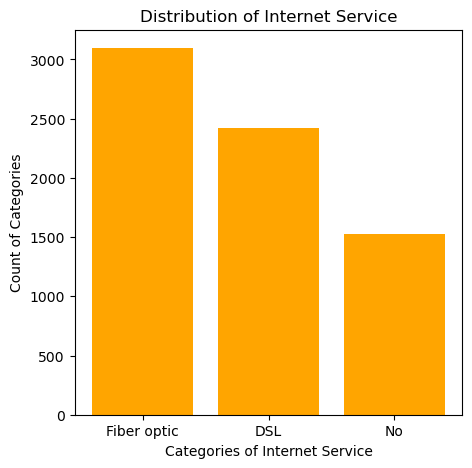

In [17]:
# ● Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange

fig = plt.figure(figsize=(5,5))
values_i=df['InternetService'].value_counts()
print(values_i)
plt.bar(values_i.index,values_i.values,color='orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()


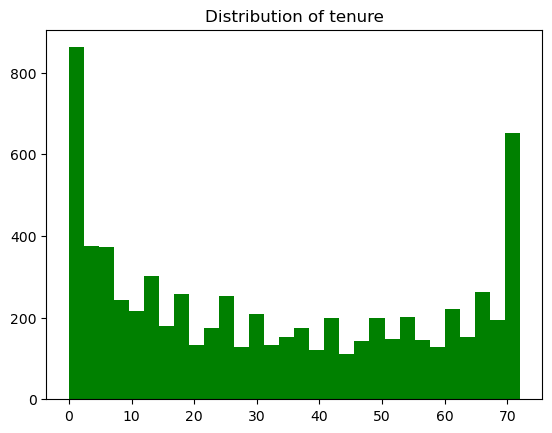

In [18]:
# ● Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure'

tenure  = df['tenure']
plt.hist(tenure,color='green',bins=30)
plt.title("Distribution of tenure")
plt.show()

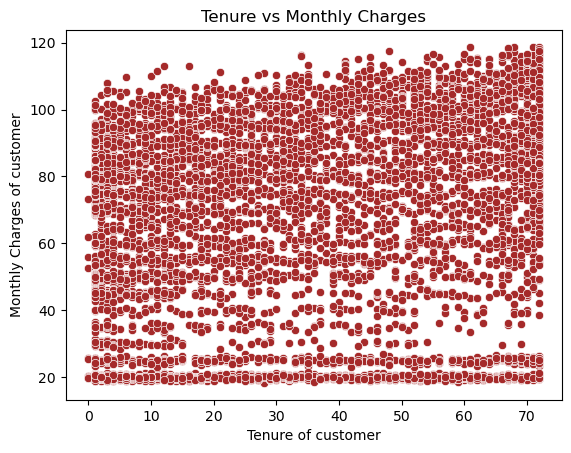

In [19]:
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’

sns.scatterplot(data = df,x = "tenure", y= "MonthlyCharges",color='brown')
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

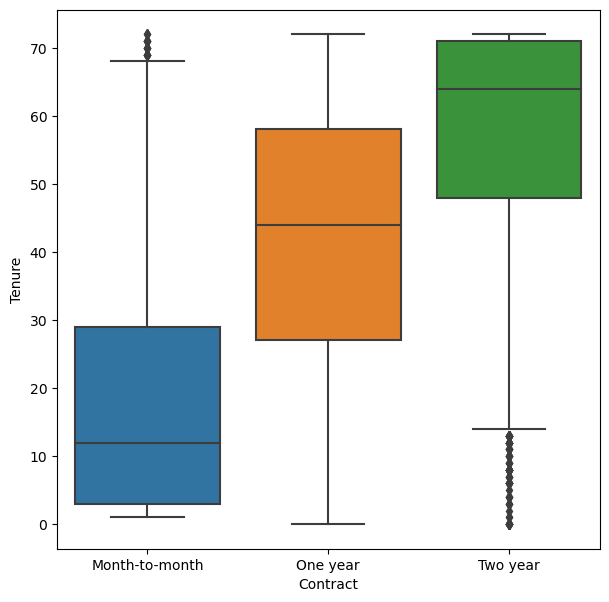

In [20]:
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

fig = plt.figure(figsize=(7,7))
sns.boxplot(data=df, x="Contract", y="tenure")
plt.xlabel("Contract")
plt.ylabel("Tenure")
plt.show()

# Linear Regression

In [21]:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
# and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
x = df[['tenure']]
y = df['MonthlyCharges']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
error= mean_squared_error(y_test,y_pred)
error

850.043757180835

In [28]:
RMSE = np.sqrt(error)
RMSE

29.15550989402921

# Logistic Regression

In [29]:
# ● Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score
# d. Build a multiple logistic regression model where dependent variable
# is ‘Churn’ and independent variables are ‘tenure’ and
# ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
x = df[['MonthlyCharges']]
y = df['Churn']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=1)

In [32]:
logr = LogisticRegression()

In [33]:
logr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = logr.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Text(58.222222222222214, 0.5, 'Actual Data')

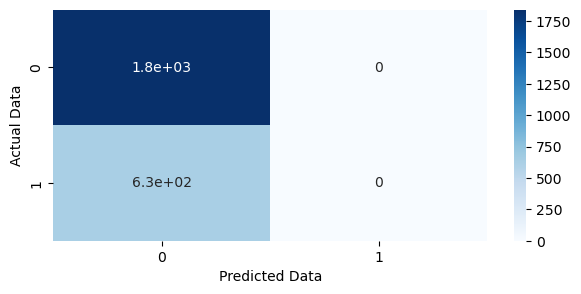

In [35]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,3))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")

In [36]:
accuracy_score(y_test,y_pred)

0.7461476074614761

In [37]:
x = df[['tenure',"MonthlyCharges"]]
y = df['Churn']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = logreg.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

Text(58.222222222222214, 0.5, 'Actual Data')

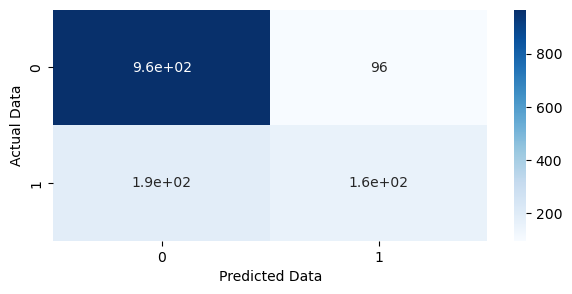

In [42]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,3))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")

In [43]:
accuracy_score(y_test,y_pred)

0.7970191625266146

In [44]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1061
         Yes       0.62      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



# Decision Tree

In [45]:
# ● Build a decision tree model where dependent variable is ‘Churn’ and
# independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
x = df[['tenure']]
y = df['Churn']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [48]:
depths = [1,2,3,4,5,6,7,8,9,10,100]
for x in depths:
    dt_model = DecisionTreeClassifier(max_depth=x,random_state=1)
    dt_model.fit(x_train,y_train)
    y_pred = dt_model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print("max_depth=",x,"accuracy_score=",acc)

max_depth= 1 accuracy_score= 0.7530163236337828
max_depth= 2 accuracy_score= 0.7622427253371186
max_depth= 3 accuracy_score= 0.7643718949609652
max_depth= 4 accuracy_score= 0.7643718949609652
max_depth= 5 accuracy_score= 0.7643718949609652
max_depth= 6 accuracy_score= 0.7643718949609652
max_depth= 7 accuracy_score= 0.7643718949609652
max_depth= 8 accuracy_score= 0.7643718949609652
max_depth= 9 accuracy_score= 0.7643718949609652
max_depth= 10 accuracy_score= 0.7643718949609652
max_depth= 100 accuracy_score= 0.7643718949609652


In [49]:
dt=DecisionTreeClassifier(max_depth=3,random_state=1)

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [51]:
y_pred=dt.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [52]:
accrcy = accuracy_score(y_test,y_pred)
accrcy

0.7643718949609652

In [53]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[983,  78],
       [254,  94]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual Data')

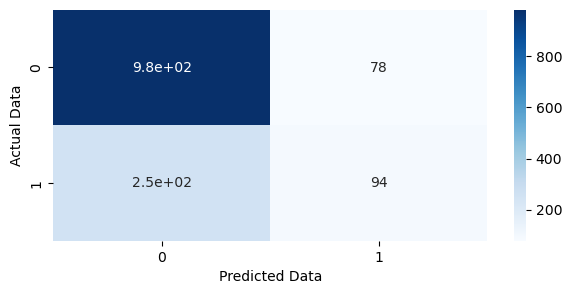

In [54]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,3))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")

In [55]:

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1061
         Yes       0.55      0.27      0.36       348

    accuracy                           0.76      1409
   macro avg       0.67      0.60      0.61      1409
weighted avg       0.73      0.76      0.73      1409



# Random Forest 

In [56]:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
x = df[['tenure',"MonthlyCharges"]]
y = df['Churn']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [59]:
rf=RandomForestClassifier()

In [60]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred=rf.predict(x_test)
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [62]:
accrcy=accuracy_score(y_test,y_pred)
accrcy

0.7581637482252721

In [63]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1347,  238],
       [ 273,  255]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual Data')

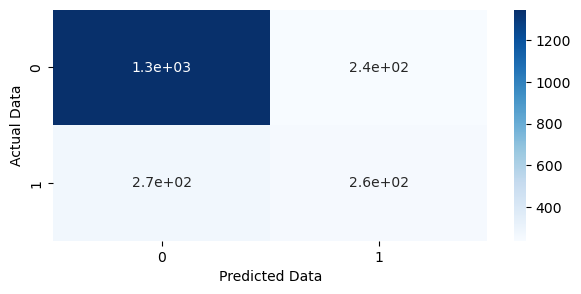

In [64]:
plt.figure(figsize=(7,3))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")

In [65]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.83      0.85      0.84      1585
         Yes       0.52      0.48      0.50       528

    accuracy                           0.76      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.76      0.76      2113

